In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
%matplotlib inline

In [2]:
def p(x,mu,sigma):
    return sp.multivariate_normal.pdf(x, mean=mu, cov=sigma)

def g(d, t, r, u, a, b, x):
    if d >= 0:
        P = np.array([[1, 0], [0, 1]])
    else:
        P = np.array([[1, 0], [0, -1]])
    S = np.array([[r*np.cos(t) + u*np.sin(t)/r, u*np.cos(t)/r - r*np.sin(t)],[np.sin(t)/r, np.cos(t)/r]])
    M = np.matmul(P, S)*np.sqrt(np.absolute(d))
    return np.matmul(x, M) + np.array([a, b])

mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])

def h(d, t, r, u, a, b, x):
    if d >= 0:
        P = np.array([[1, 0], [0, 1]])
    else:
        P = np.array([[1, 0], [0, -1]])
    S = np.array([[r*np.cos(t) + u*np.sin(t)/r, u*np.cos(t)/r - r*np.sin(t)],[np.sin(t)/r, np.cos(t)/r]])
    M = np.matmul(P, S)*np.sqrt(np.absolute(d))
               
    p0 = p(x, mu, sigma)
    p1 = p(x, np.matmul(mu, M) + np.array([a, b]), np.matmul(np.transpose(M), np.matmul(sigma, M)))
    return p0/(p0 + p1)

In [3]:
#d, t plane

N = 10**3
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 2*np.pi
low_1 = 0
high_2 = 3
low_2 = -3
r = 1
u = 0
a = 0
b = 0
step = 30
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for t in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for d in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1
    
mylosses -= np.max(mylosses)

In [4]:
t_i =  [2.2519753, 3.9980206, 0.054841314, 4.6385226, 2.212541, 6.116306, 4.6776752, 3.168824, 4.4231935, 0.086253464, 2.7684093, 3.3665433, 2.3709457, 0.91901404, 4.328354, 6.0218854, 1.5185931, 5.937545, 2.037743, 4.623096]
d_i =  [-2.802136, -2.1777878, 1.7108345, 2.5817547, 1.6744986, 2.3266344, -0.8631377, 2.7318978, 2.1254797, 1.3806591, 0.47183132, 1.0401678, -1.5673156, 2.2599707, -1.0216169, 2.1207948, 2.265059, -1.1039643, -2.2791495, 1.4007959]
t_f =  [1.7037178, 4.2228413, 0.38441142, 4.5371923, 2.1579888, 5.280521, 4.683489, 2.0695384, 4.4812055, 0.08352753, 2.5905247, 3.3361247, 2.3367126, 1.3355259, 4.4643555, 5.55778, 1.4805998, 6.023208, 1.8608352, 4.702983]
d_f =  [-0.98695, -0.961403, 0.92540747, 1.057309, 0.99420637, 0.97658163, -1.0092982, 1.0155317, 0.9134589, 1.0375991, 0.95074666, 1.032391, -0.9833262, 0.9040986, -0.9795231, 1.0666294, 0.9850402, -0.9874064, -1.0880556, 0.99926525]

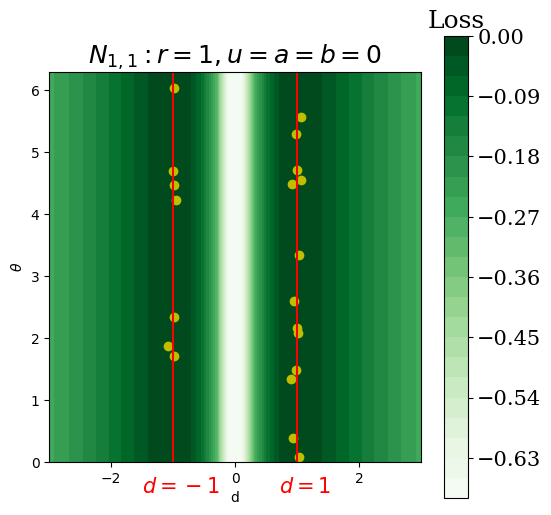

In [5]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))
plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"

ax.set_aspect('equal')
ax.set_xlabel('d')
ax.set_ylabel(r'$\theta$')
cf = ax.contourf(X,Y,Z, 25, cmap='Greens')

plt.scatter(d_f, t_f, c='y', label='Learned values')
clb = fig.colorbar(cf, ax=ax)
clb.ax.set_title('Loss')
plt.axvline(-1, c='r', label="Analytic max")
plt.axvline(1, c = 'r')
#plt.scatter([1, -1], [np.pi, 0.5*np.pi], marker='*', c='yellow')
ax.text(0.7, -0.5, r'$d = 1$', c = 'r')
ax.text(-1.5, -.5, r'$d = -1$', c = 'r')
plt.title('$N_{1, 1}: r = 1, u = a = b = 0$')
plt.savefig('6O2d-tsymm.pdf')

In [6]:
#r, u plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = -3
high_2 = 3
low_2 = 0.1
d = 1
t = 0
a = 0
b = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for u in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for r in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1
mylosses -= np.max(mylosses)

In [7]:
r_i =  [4.047737, 0.84063965, 0.13682911, 3.8362315, 3.8677125, 3.6373777, 2.8207164, 2.4288027, 3.2546165, 1.873911, 4.6465254, 3.0711076, 1.3932312, 2.7272558, 3.3701437, 4.035857, 4.7524476, 4.4768085, 3.0448525, 4.9576974]
u_i =  [3.3579054, -4.5666494, -0.15011692, -3.540461, 1.6594086, 0.740963, -3.8030112, 4.389099, -2.4899662, 2.7390156, -0.43959713, -2.5205946, 0.37490845, -2.0045698, -2.9170394, 0.34424686, 2.1927428, 4.366885, -3.0970168, -4.181629]
r_f =  [1.0068989, 0.9758745, 0.984598, 1.00167, 0.9945651, 0.94825447, 1.0486709, 1.0948684, 1.0296663, 0.99369985, 0.9932631, 1.0295595, 1.0492258, 1.0054741, 0.9595521, 1.015585, 0.9778937, 1.0091602, 0.93136644, 0.9979317]
u_f =  [-0.0561115, -0.0025799843, 0.048850406, -0.067383595, 0.07411632, 0.05210436, 0.008509087, -0.0027763678, -0.05630437, 0.022677545, 0.0114689255, -0.00998354, 0.06967805, 0.049570683, -0.0018069658, 0.014975463, -0.019112213, 0.034702126, -0.017755948, 0.001407847]

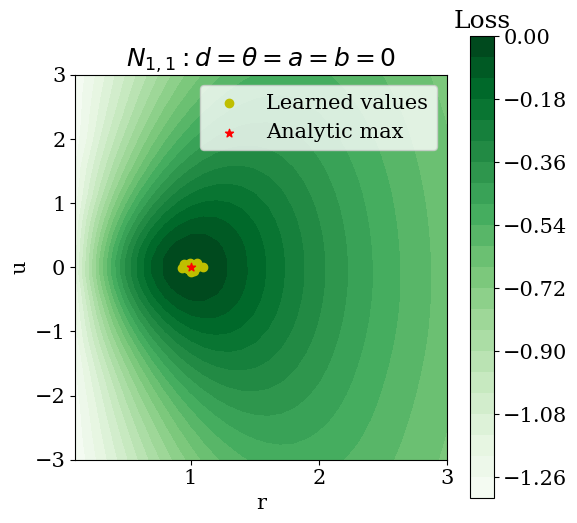

In [8]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6, 6))
plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"


ax.set_aspect(0.5)
ax.set_xlabel('r')
ax.set_ylabel('u')
cf = ax.contourf(X,Y,Z, 25, cmap='Greens')
clb = fig.colorbar(cf, ax=ax)
plt.title(r'$N_{1, 1}: d = \theta = a = b = 0$')
clb.ax.set_title('Loss')
plt.scatter(r_f, u_f, c = 'y', label='Learned values')
plt.scatter([1], [0], marker='*', c='r', label='Analytic max')
#ax.annotate('(1, 0)', xy=(1.1, 0), c='r')
plt.legend()
plt.savefig('6GL2symmRU.pdf', bbox_inches='tight')
plt.show()

In [9]:
#a, b plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
low_1 = -3
high_1 = 3
low_2 = -3
high_2 = 3
d = -1
t = np.pi
r = 1
u = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for b in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for a in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

mylosses -= np.max(mylosses)

In [13]:
a_i =  [0.23672965, 0.37524107, 2.8231397, 5.800371, 4.22334, 1.6893481, 3.062135, 1.7646577, 1.874941, 5.473743, 1.8044753, 0.1406184, 5.7260537, 5.925517, 2.0579462, 2.5822449, 1.523401, 2.3008006, 1.482143, 4.5270905]
b_i =  [-2.84941, 1.3421583, -0.94449663, 1.6543279, -0.98116636, -2.620117, -1.9626818, -0.49078274, 0.47958398, -0.59957814, -1.2394223, 1.8615217, 1.2219038, -1.8120704, 1.8111267, -1.5768464, -2.0534263, -0.35373902, 2.56491, -1.4914577]
a_f =  [0.015444086, -0.006142338, -0.0039872536, 0.00010704729, -0.02932364, -0.032679994, 0.020055933, 0.0050159227, 0.0338887, 0.0015209746, 0.02328482, -0.07239324, -0.0018563131, -0.0013643276, 0.011070831, -0.051665563, 0.005034077, -0.028441755, -0.07202371, 0.00797613]
b_f =  [0.01699028, -0.09830572, 0.017103173, 0.025279343, -0.020669306, 0.0035374311, 0.021222485, -0.016742978, 0.039285764, 0.07137559, -0.03546282, -0.026467836, 0.0077158045, 0.016804436, 0.007409158, 0.025343828, 0.0051916814, -0.01253972, 0.023716336, -0.008413042]

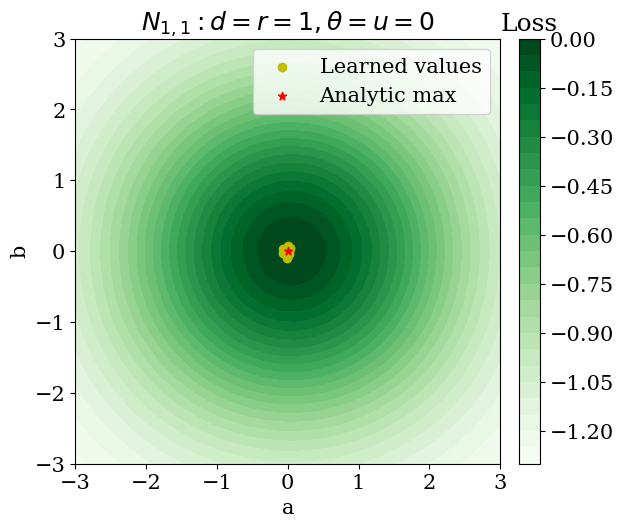

In [14]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))
plt.rc('font', size=15)

ax.set_aspect('equal')
ax.set_xlabel('a')
ax.set_ylabel('b')

cf = ax.contourf(X,Y,Z, 25, cmap='Greens')
clb = fig.colorbar(cf, ax=ax, fraction=0.0457, pad=0.04)

clb.ax.set_title('Loss')
plt.scatter(a_f, b_f, c='y', label="Learned values")
plt.scatter([0], [0], marker='*', c='r', label='Analytic max')
#ax.annotate('(0, 0)', xy=(0.1, 0.1))
plt.legend()
plt.title(r'$N_{1, 1}: d = r = 1, \theta = u = 0$')
plt.savefig("6GL2symmAB.pdf",  bbox_inches='tight')

In [15]:
def p(x,mu,sigma):
    return sp.multivariate_normal.pdf(x, mean=mu, cov=sigma)

def g(d, t, r, u, a, b, x):
    if d >= 0:
        P = np.array([[1, 0], [0, 1]])
    else:
        P = np.array([[1, 0], [0, -1]])
    S = np.array([[r*np.cos(t) + u*np.sin(t)/r, u*np.cos(t)/r - r*np.sin(t)],[np.sin(t)/r, np.cos(t)/r]])
    M = np.matmul(P, S)*np.sqrt(np.absolute(d))
    return np.matmul(x, M) + np.array([a, b])

mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 2]])

def h(d, t, r, u, a, b, x):
    if d >= 0:
        P = np.array([[1, 0], [0, 1]])
    else:
        P = np.array([[1, 0], [0, -1]])
    S = np.array([[r*np.cos(t) + u*np.sin(t)/r, u*np.cos(t)/r - r*np.sin(t)],[np.sin(t)/r, np.cos(t)/r]])
    M = np.matmul(P, S)*np.sqrt(np.absolute(d))
               
    p0 = p(x, mu, sigma)
    p1 = p(x, np.matmul(mu, M) + np.array([a, b]), np.matmul(np.transpose(M), np.matmul(sigma, M)))
    return p0/(p0 + p1)

In [16]:
#d, u plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = -3
high_2 = 3
low_2 = -3
t = 0
r = 1
a = 0
b = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for u in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for d in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1
mylosses -= np.max(mylosses)

In [17]:
u_i =  [0.74330306, 2.0197306, 0.35118985, 1.2599816, 0.93120074, -1.6220326, -1.7608337, 0.66727924, -0.65281034, -0.24267411, -1.2346988, -2.3850174, 2.0904646, -0.69405055, -0.8392625, -2.6286178, -0.8140025, 2.4714441, -2.8497348, 0.59570503]
d_i =  [2.0663528, -2.536558, -2.5698946, -1.5408111, 1.3404303, 0.26585412, 0.83636, 2.1771545, -2.9975789, 0.17056489, -1.7677016, -0.6905601, -0.1685965, -1.0995619, -2.731852, 1.6203418, -0.09537792, 0.21396089, 0.14102626, -0.7540548]
u_f =  [0.036259692, -0.04258561, -0.045590527, -0.063331395, 0.046148058, 0.029422384, 0.021095905, 0.034666844, -0.0009113727, -0.06167609, 0.0028195987, 0.008371371, 0.011827294, -0.0008035423, -0.019023865, -0.0044161594, 0.038392715, -0.072105154, -0.012294286, -0.017387042]
d_f =  [0.96147704, -0.9398238, -1.0268015, -0.977005, 1.0289257, 0.91465056, 1.0032208, 0.9810713, -1.0206453, 0.9860393, -0.9392466, -0.9670328, -1.0216293, -0.940156, -1.0251347, 0.98722965, -0.89933693, 1.0361271, 1.0053596, -0.98507524]

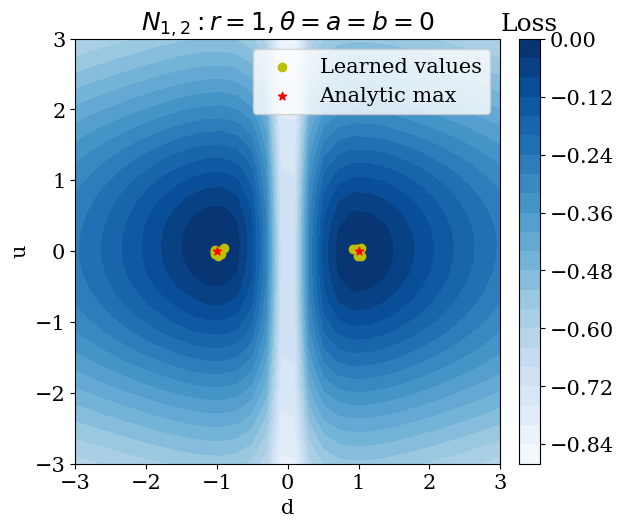

In [19]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))
plt.rc('font', size=15)

ax.set_aspect('equal')
ax.set_xlabel('d')
ax.set_ylabel('u')

cf = ax.contourf(X,Y,Z, 25, cmap='Blues')
clb = fig.colorbar(cf, ax=ax, fraction=0.0457, pad=0.04)

clb.ax.set_title('Loss')
plt.scatter(d_f, u_f, c='y', label="Learned values")
plt.scatter([1, -1], [0, 0], marker='*', c='r', label='Analytic max')
#ax.annotate('(0, 0)', xy=(0.1, 0.1))
plt.legend()
plt.title(r'$N_{1, 2}: r = 1, \theta = a = b = 0$')
plt.savefig("6GL2symmAB.pdf",  bbox_inches='tight')

In [20]:
#t, r plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = 0.1
high_2 = 2*np.pi+1
low_2 = 0
d = -1
u = 0
a = 0
b = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for r in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for t in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

mylosses -= np.max(mylosses)

In [21]:
#Asymm Gaussian 50
r_i =  [2.063396, 3.6636972, 2.5103862, 3.5810902, 3.6325674, 4.495326, 1.984934, 0.8320688, 0.9919299, 2.1490164, 3.3116856, 1.1730748, 4.42944, 1.566651, 4.1210523, 3.980332, 2.39257, 3.1232696, 2.4356117, 3.6188755, 2.6474538, 4.875555, 2.510895, 0.58553684, 0.707799, 1.3470888, 1.9152215, 4.835427, 0.61661935, 2.6475332, 2.0312953, 1.7302593, 2.613502, 4.7913213, 4.511952, 3.201679, 3.0997684, 1.7308283, 2.8530886, 0.7313831, 2.1871219, 0.1435962, 3.6228278, 1.3806362, 4.171863, 1.9733367, 3.9872887, 0.15671976, 3.621785, 3.655354]
t_i =  [5.283809, 5.47323, 3.6387823, 3.9622524, 1.1548951, 3.897201, 2.3732586, 3.1352837, 3.9746387, 5.7943068, 1.0778327, 5.792286, 2.5133586, 0.6106045, 1.8384161, 4.9308143, 4.39754, 3.404168, 0.9744733, 3.158823, 1.8573557, 0.6655335, 4.095487, 0.82793546, 0.16464378, 5.392879, 2.4576747, 5.7138734, 5.67145, 4.8598266, 4.95737, 3.1813219, 4.643473, 5.5258446, 4.4472413, 5.421492, 5.6321692, 2.7284718, 4.7436476, 4.9598193, 3.2055292, 3.5655048, 3.7990787, 0.71796596, 4.5929117, 2.0998602, 4.770995, 6.095508, 5.70822, 1.720558]
r_f =  [1.367187, 1.4238274, 1.512439, 1.458223, 1.3575237, 1.4233363, 1.3696543, 0.97316676, 1.4422977, 1.49283, 1.3939086, 1.0406915, 1.356594, 1.451498, 1.4384165, 1.4370223, 1.385872, 1.4634211, 1.4201206, 1.4590988, 1.4166975, 1.4641503, 1.420858, 0.94242096, 1.0257096, 1.5293878, 1.3941123, 1.412231, 1.0065454, 1.4459907, 1.4174943, 1.0228099, 1.4323775, 1.4123508, 1.4236925, 1.3879843, 1.4693421, 1.4628977, 1.4559647, 1.4243586, 1.3931509, 0.99704975, 1.4169141, 1.4442147, 1.3903972, 1.3451343, 1.4358016, 0.97837377, 1.402371, 1.3870515]
t_f =  [4.78514, 4.7455807, 4.760715, 4.7438602, 1.5782859, 4.7247753, 1.5924724, 3.2692423, 4.7897315, 4.7405195, 1.6019046, 6.343696, 1.5436602, 1.4656489, 1.5331241, 4.716511, 4.6493616, 4.6813674, 1.5569783, 1.5585345, 1.593144, 1.5823615, 4.731026, -0.045434456 + 2*np.pi, 0.01640383 + 2*np.pi, 4.7840915, 1.5650119, 4.728571, 6.27298, 4.698145, 4.653401, 3.0271366, 4.790637, 4.6883116, 4.7108326, 4.7267146, 4.7524047, 1.5506527, 4.677791, 4.7403774, 4.728751, 3.1290557, 4.7226524, 1.5491346, 4.730191, 1.5581867, 4.7097545, 6.3255105, 4.711753, 1.555137]

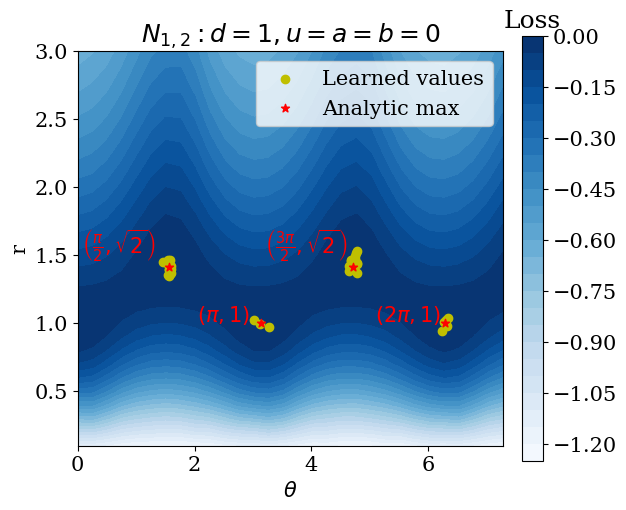

In [22]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))
plt.rc('font', size=15)

ax.set_aspect(7/3)
ax.set_xlabel('$\\theta$')
ax.set_ylabel('r')

cf = ax.contourf(X,Y,Z, 25, cmap='Blues')
clb = fig.colorbar(cf, ax=ax, fraction=0.0457, pad=0.04)

clb.ax.set_title('Loss')
plt.scatter(t_f, r_f, c='y', label="Learned values")
plt.scatter([2*np.pi, np.pi, 1.5*np.pi, 0.5*np.pi], [1, 1, np.sqrt(2), np.sqrt(2)], marker='*', c='r', label='Analytic max')
ax.annotate(r'$\left(\frac{\pi}{2}, \sqrt{2}\right)$ ', xy=(np.pi/2 -1.5, 1.51), c='r')
ax.annotate(r'$\left(\pi, 1\right)$ ', xy=(np.pi-1.1, 1.01), c='r')
ax.annotate(r'$\left(\frac{3\pi}{2}, \sqrt{2}\right)$ ', xy=(3*np.pi/2-1.5, 1.51), c='r')
ax.annotate(r'$\left(2\pi, 1\right)$ ', xy=(2*np.pi-1.2, 1.01), c='r')


plt.legend()
plt.title(r'$N_{1, 2}: d = 1, u = a = b = 0$')
plt.savefig("6GL2asymmTR.pdf",  bbox_inches='tight')
plt.show()

In [23]:
#a, b plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
low_1 = -3
high_1 = 3
low_2 = -3
high_2 = 3
d = 1
t = 0
r = 1
u = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for b in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for a in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1
    
mylosses -= np.max(mylosses)

In [24]:
a_i =  [0.23672965, 0.37524107, 2.8231397, 5.800371, 4.22334, 1.6893481, 3.062135, 1.7646577, 1.874941, 5.473743, 1.8044753, 0.1406184, 5.7260537, 5.925517, 2.0579462, 2.5822449, 1.523401, 2.3008006, 1.482143, 4.5270905]
b_i =  [-2.84941, 1.3421583, -0.94449663, 1.6543279, -0.98116636, -2.620117, -1.9626818, -0.49078274, 0.47958398, -0.59957814, -1.2394223, 1.8615217, 1.2219038, -1.8120704, 1.8111267, -1.5768464, -2.0534263, -0.35373902, 2.56491, -1.4914577]
a_f =  [0.015444086, -0.006142338, -0.0039872536, 0.00010704729, -0.02932364, -0.032679994, 0.020055933, 0.0050159227, 0.0338887, 0.0015209746, 0.02328482, -0.07239324, -0.0018563131, -0.0013643276, 0.011070831, -0.051665563, 0.005034077, -0.028441755, -0.07202371, 0.00797613]
b_f =  [0.01699028, -0.09830572, 0.017103173, 0.025279343, -0.020669306, 0.0035374311, 0.021222485, -0.016742978, 0.039285764, 0.07137559, -0.03546282, -0.026467836, 0.0077158045, 0.016804436, 0.007409158, 0.025343828, 0.0051916814, -0.01253972, 0.023716336, -0.008413042]

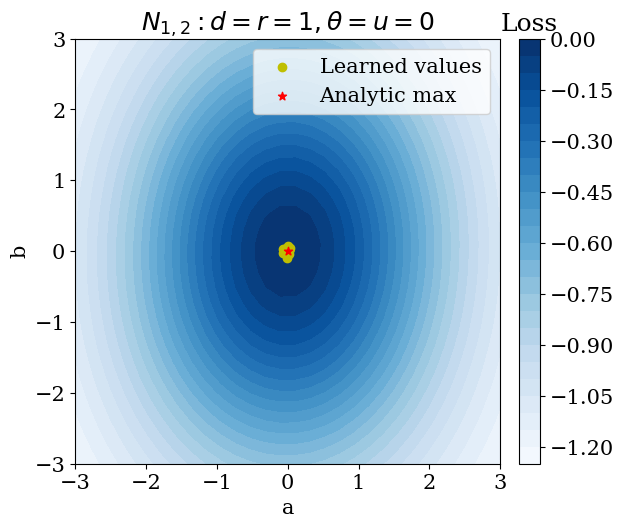

In [25]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))
plt.rc('font', size=15)

ax.set_aspect('equal')
ax.set_xlabel('a')
ax.set_ylabel('b')

cf = ax.contourf(X,Y,Z, 25, cmap='Blues')
clb = fig.colorbar(cf, ax=ax, fraction=0.0457, pad=0.04)

clb.ax.set_title('Loss')
plt.scatter(a_f, b_f, c='y', label="Learned values")
plt.scatter([0], [0], marker='*', c='r', label='Analytic max')
#ax.annotate('(0, 0)', xy=(0.1, 0.1))
plt.legend()
plt.title(r'$N_{1, 2}: d = r = 1, \theta = u = 0$')
plt.savefig("6GL2asymmAB.pdf",  bbox_inches='tight')